In [55]:
# importando as bibliotecas necessárias
import pandas as pd # manipulação de datasets
import numpy as np  # operações matemáticas 

# sklearn é uma biblioteca de data science e machine learning
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# biblioteca para visualização
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm


In [56]:
data = pd.read_csv('Liver_GSE14520_U133A.csv')
data

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM362958.CEL.gz,HCC,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
1,GSM362959.CEL.gz,HCC,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
2,GSM362960.CEL.gz,HCC,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
3,GSM362964.CEL.gz,HCC,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
4,GSM362965.CEL.gz,HCC,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,GSM712537.CEL.gz,normal,6.857025,3.965635,3.883590,6.190071,3.054398,6.339694,3.993988,3.566907,...,11.354129,11.039429,12.779742,12.677145,3.883899,3.362722,3.550832,3.142141,3.154087,3.412942
353,GSM712538.CEL.gz,normal,7.291103,3.779197,4.024521,5.456527,3.275127,5.870166,3.872936,3.729544,...,11.343014,11.124686,12.861682,12.691833,3.756814,3.198867,3.359730,3.020554,3.250578,3.189661
354,GSM712539.CEL.gz,normal,7.493958,4.200727,3.791528,5.576578,3.118160,5.400790,3.927906,3.421077,...,11.542476,11.371326,13.228540,12.999379,5.796103,3.424177,4.173774,3.205583,3.068978,3.148050
355,GSM712540.CEL.gz,normal,6.835236,4.112805,3.907909,5.786022,3.164424,5.996150,4.019206,3.533469,...,11.855368,11.659300,13.176290,13.018847,6.537310,4.140005,4.578915,3.185101,3.086303,3.224059


### a) Normalizar os dados

In [57]:
colunas = list(data.columns)
colunas.remove('samples')
colunas.remove('type')

for i in tqdm(range(len(colunas))):
    coluna = colunas[i]
    data[coluna] = (data[coluna] - data[coluna].mean())/np.std(data[coluna])

100%|██████████| 22277/22277 [06:15<00:00, 59.39it/s] 


In [58]:
data

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM362958.CEL.gz,HCC,-0.149175,0.365217,6.099383,-0.757729,0.456567,0.713222,-1.663846,-1.099900,...,-1.670419,-1.787035,-2.053513,-1.527354,-0.929856,-0.772452,-0.743016,-0.189244,-0.367012,0.555976
1,GSM362959.CEL.gz,HCC,0.838733,-0.331300,-0.512948,1.011581,0.960557,0.755060,-0.133063,0.355164,...,-0.510828,-0.405998,-0.600777,-0.893883,-0.809623,-0.554660,-0.545344,1.912950,2.246443,0.926435
2,GSM362960.CEL.gz,HCC,1.112429,-0.446464,-1.234539,-0.868440,2.387877,-0.258837,-1.252954,1.037434,...,-1.440396,-1.762420,-1.905848,-2.362047,-0.941971,-0.043169,-0.573665,1.524638,0.698948,1.503457
3,GSM362964.CEL.gz,HCC,0.001439,-0.704860,-0.531929,-0.095346,1.626216,1.143321,-0.695955,0.286283,...,-1.740887,-1.607851,-2.799575,-2.454442,-0.920882,-0.720408,-0.806552,1.172408,-0.312727,0.628088
4,GSM362965.CEL.gz,HCC,-0.457242,0.453957,0.149404,2.064896,1.494614,-1.099229,-0.099717,-0.649723,...,-1.262087,-1.251270,-1.137067,-0.866259,-0.753696,-0.516033,-0.599609,-0.148584,1.535590,0.728551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,GSM712537.CEL.gz,normal,-0.078896,-0.772676,-0.249716,1.587687,-1.211542,0.858943,0.939609,0.213581,...,-0.765614,-0.876011,-0.823878,-0.638875,-0.908710,-0.425397,-0.535412,-0.531124,-0.421959,0.858723
353,GSM712538.CEL.gz,normal,0.467552,-1.133742,0.058384,-0.678534,0.668715,-0.162163,0.396785,1.326204,...,-0.781859,-0.754761,-0.614489,-0.606783,-1.003632,-0.690632,-0.750160,-1.262097,0.419478,-0.594196
354,GSM712539.CEL.gz,normal,0.722920,-0.317381,-0.450980,-0.307648,-0.668389,-1.182936,0.643280,-0.784064,...,-0.490323,-0.403997,0.322980,0.065182,0.519537,-0.325918,0.164608,-0.149718,-1.164138,-0.864965
355,GSM712540.CEL.gz,normal,-0.106325,-0.487658,-0.196550,0.339411,-0.274295,0.111822,1.052689,-0.015175,...,-0.032995,0.005551,0.189460,0.107719,1.073153,0.832809,0.619878,-0.272853,-1.013055,-0.370368


### b) Separação conjunto de treinamente e conjunto de teste estratificado.

### Obs: Normal = 0, HCC = 1 

In [71]:
from sklearn.model_selection import StratifiedKFold
X = data[colunas].copy()
y = data['type'].copy()

#Separação em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

#Separação Treino e Teste para validação cruzada (kfolding)
#Splits= 5, Test size = 20%
skf = StratifiedKFold(n_splits=5)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: =\n{y.iloc[train_index].value_counts().to_string()}")
    print(f"  Test:  index=\n{y.iloc[test_index].value_counts().to_string()}\n")

y = y.apply(lambda x: 1 if x == 'HCC' else 0)


Fold 0:
  Train: =
HCC       144
normal    141
  Test:  index=
HCC       37
normal    35

Fold 1:
  Train: =
HCC       145
normal    140
  Test:  index=
HCC       36
normal    36

Fold 2:
  Train: =
HCC       145
normal    141
  Test:  index=
HCC       36
normal    35

Fold 3:
  Train: =
HCC       145
normal    141
  Test:  index=
HCC       36
normal    35

Fold 4:
  Train: =
HCC       145
normal    141
  Test:  index=
HCC       36
normal    35



### c) Criação do modelos de classificação SVM e LGBM, com validação cruzada

In [95]:
from sklearn.model_selection import cross_validate
from sklearn import metrics

from sklearn import svm
import lightgbm as lgb

clf_lgbm = lgb.LGBMClassifier()
clf_svm = svm.SVC()

### d) Analise da matriz de confusão e das métricas atingidas pelos modelos.

Métricas LGBM
Acurácia: 0.97
Precisão: 0.98
Sensitivity: 0.96
Specificity: 0.98
F1: 0.97
----------------------------
Métricas SVM
Acurácia: 0.96
Precisão: 0.96
Sensitivity: 0.96
Specificity: 0.95
F1: 0.96


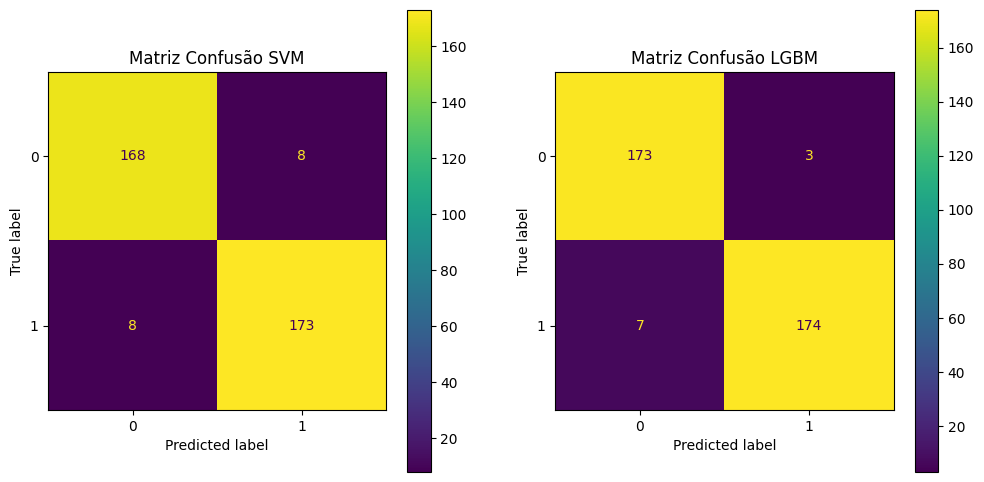

In [96]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## MATRIZ DE CONFUSÃO
fig, axes = plt.subplots(1, 2, figsize=(12,6))

y_pred = cross_val_predict(clf_svm, X, y, cv=skf)
cm_svm = confusion_matrix(y, y_pred)

y_pred = cross_val_predict(clf_lgbm, X, y, cv=skf)
cm_lgbm = confusion_matrix(y, y_pred)

axes[0].set_title('Matriz Confusão SVM')
axes[1].set_title('Matriz Confusão LGBM')
ConfusionMatrixDisplay(confusion_matrix=cm_svm).plot(ax = axes[0])
ConfusionMatrixDisplay(confusion_matrix=cm_lgbm).plot(ax = axes[1])


## MÉTRICAS
TP = (1,1)
TN = (0,0)
FP = (0,1)
FN = (1,0)
print('Métricas LGBM')
print(f"Acurácia: {round((cm_lgbm[TP] + cm_lgbm[TN])/(cm_lgbm[TP]+cm_lgbm[TN] + cm_lgbm[FP] + cm_lgbm[FN]),2)}")
print(f"Precisão: {round(cm_lgbm[TP] / (cm_lgbm[TP] + cm_lgbm[FP]),2)}")
print(f"Sensitivity: {round(cm_lgbm[TP]/(cm_lgbm[TP]+cm_lgbm[FN]),2)}")
print(f"Specificity: {round(cm_lgbm[TN]/(cm_lgbm[TN]+cm_lgbm[FP]),2)}")
print(f"F1: {round(2 * cm_lgbm[TP]/(2 * cm_lgbm[TP] + cm_lgbm[FN]+cm_lgbm[FP]),2)}")
print('----------------------------')
print('Métricas SVM')
print(f"Acurácia: {round((cm_svm[TP] + cm_svm[TN])/(cm_svm[TP]+cm_svm[TN] + cm_svm[FP] + cm_svm[FN]),2)}")
print(f"Precisão: {round(cm_svm[TP] / (cm_svm[TP] + cm_svm[FP]),2)}")
print(f"Sensitivity: {round(cm_svm[TP]/(cm_svm[TP]+cm_svm[FN]),2)}")
print(f"Specificity: {round(cm_svm[TN]/(cm_svm[TN]+cm_svm[FP]),2)}")
print(f"F1: {round(2 * cm_svm[TP]/(2 * cm_svm[TP] + cm_svm[FN]+cm_svm[FP]),2)}")


### e) Clusterização com KMeans

In [97]:
print('---------------------------------')
for num_cluster in range(2,5):
    kmeans = KMeans(n_clusters=num_cluster, random_state=0, n_init = 'auto').fit(X) # cria um modelo simples de k-means com 2 clusters, obtido dos dados em X
    clusters = kmeans.predict(X)
    print(f"KMeans com {num_cluster} grupos") 
    print(pd.Series(clusters).value_counts().to_string())
    print('---------------------------------')

---------------------------------
KMeans com 2 grupos
1    198
0    159
---------------------------------
KMeans com 3 grupos
1    153
0    149
2     55
---------------------------------
KMeans com 4 grupos
1    141
3    102
0     58
2     56
---------------------------------
